In [3]:
import pandas as pd

In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [4]:
credit = pd.read_csv('default_credit_card_clients.csv', header =0)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,...,JuneBill,MayBill,AprilBill,SeptemberPayment,AugustPayment,JulyPayment,JunePayment,MayPayment,AprilPayment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,...,JuneBill,MayBill,AprilBill,SeptemberPayment,AugustPayment,JulyPayment,JunePayment,MayPayment,AprilPayment,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [44]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'SeptemberPay', 'AugustPay', 'JulyPay', 'JunePay', 'MayPay', 'AprilPay',
       'SeptemberBill', 'AugustBill', 'JulyBill', 'JuneBill', 'MayBill',
       'AprilBill', 'SeptemberPayment', 'AugustPayment', 'JulyPayment',
       'JunePayment', 'MayPayment', 'AprilPayment', 'amount_past_due',
       'default payment next month'],
      dtype='object')

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null int64
AugustPay                     30000 non-null int64
JulyPay                       30000 non-null int64
JunePay                       30000 non-null int64
MayPay                        30000 non-null int64
AprilPay                      30000 non-null int64
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null int64
AprilBill               

In [7]:
credit = credit.astype({"ID":'category', "SEX":'category', "EDUCATION":'category', "MARRIAGE":'category', "SeptemberPay":'category', "AugustPay":'category', "JulyPay":'category', "JunePay":'category', "MayPay":'category', "AprilPay":'category', "default payment next month":'category'})
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null category
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null category
AugustPay                     30000 non-null category
JulyPay                       30000 non-null category
JunePay                       30000 non-null category
MayPay                        30000 non-null category
AprilPay                      30000 non-null category
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null 

In [8]:
credit['amount_past_due'] = (credit.SeptemberBill +  credit.AugustBill + credit.JulyBill + credit.JuneBill + credit.MayBill + credit.AprilBill) - (credit.SeptemberPayment +  credit.AugustPayment + credit.JulyPayment + credit.JunePayment + credit.MayPayment + credit.AprilPayment)
cols = credit.columns.tolist()
cols = ['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'SeptemberPay',
 'AugustPay',
 'JulyPay',
 'JunePay',
 'MayPay',
 'AprilPay',
 'SeptemberBill',
 'AugustBill',
 'JulyBill',
 'JuneBill',
 'MayBill',
 'AprilBill',
 'SeptemberPayment',
 'AugustPayment',
 'JulyPayment',
 'JunePayment',
 'MayPayment',
 'AprilPayment',
        'amount_past_due',
 'default payment next month']
credit = credit[cols]
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID                            30000 non-null category
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null category
AugustPay                     30000 non-null category
JulyPay                       30000 non-null category
JunePay                       30000 non-null category
MayPay                        30000 non-null category
AprilPay                      30000 non-null category
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null 

In [11]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,...,MayBill,AprilBill,SeptemberPayment,AugustPayment,JulyPayment,JunePayment,MayPayment,AprilPayment,amount_past_due,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,7015,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,12077,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,90635,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,222946,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,50290,0


In [12]:
credit.isnull().values.any()

False

In [13]:
credit['AGE'].describe()
pd.qcut(credit['AGE'], q=5)

0        (20.999, 27.0]
1        (20.999, 27.0]
2          (31.0, 37.0]
3          (31.0, 37.0]
4          (43.0, 79.0]
              ...      
29995      (37.0, 43.0]
29996      (37.0, 43.0]
29997      (31.0, 37.0]
29998      (37.0, 43.0]
29999      (43.0, 79.0]
Name: AGE, Length: 30000, dtype: category
Categories (5, interval[float64]): [(20.999, 27.0] < (27.0, 31.0] < (31.0, 37.0] < (37.0, 43.0] < (43.0, 79.0]]

In [14]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'SeptemberPay', 'AugustPay', 'JulyPay', 'JunePay', 'MayPay', 'AprilPay',
       'SeptemberBill', 'AugustBill', 'JulyBill', 'JuneBill', 'MayBill',
       'AprilBill', 'SeptemberPayment', 'AugustPayment', 'JulyPayment',
       'JunePayment', 'MayPayment', 'AprilPayment', 'amount_past_due',
       'default payment next month'],
      dtype='object')


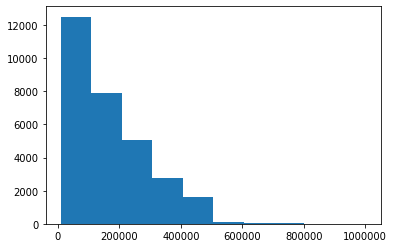

In [17]:
import matplotlib.pyplot as plt
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

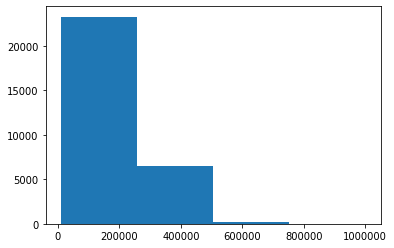

In [18]:
plt.hist(credit['LIMIT_BAL'], bins=4)

(array([16809., 10511.,  2570.,   110.]),
 array([21. , 35.5, 50. , 64.5, 79. ]),
 <a list of 4 Patch objects>)

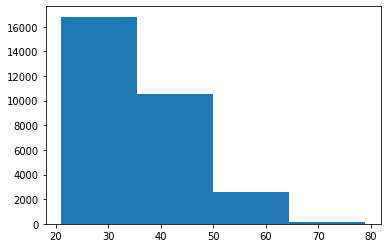

In [21]:
plt.hist(credit['AGE'], bins=4)

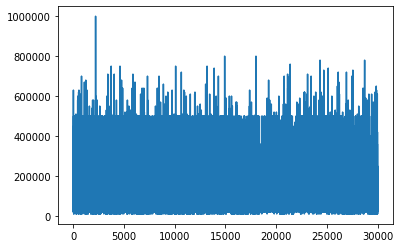

In [22]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

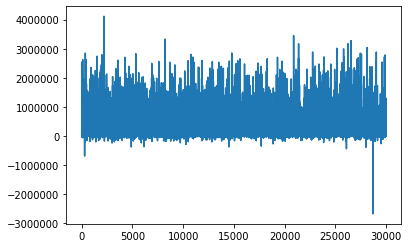

In [23]:
plt.plot(credit['amount_past_due'])
plt.show()

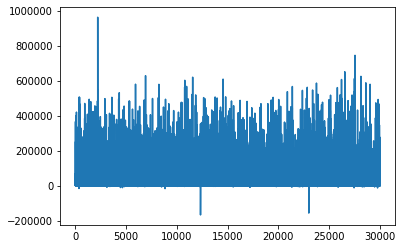

In [25]:
plt.plot(credit['SeptemberBill'])
plt.show()

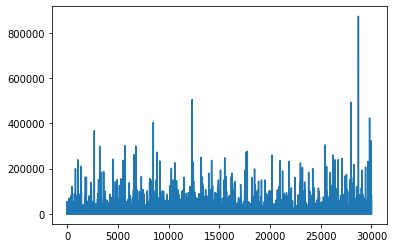

In [27]:
plt.plot(credit['SeptemberPayment'])
plt.show()

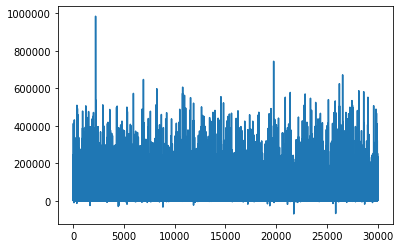

In [28]:
plt.plot(credit['AugustBill'])
plt.show()

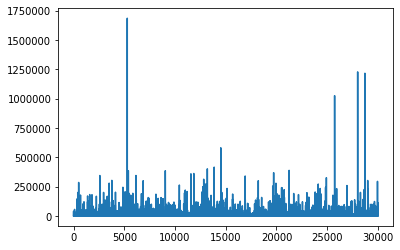

In [29]:
plt.plot(credit['AugustPayment'])
plt.show()

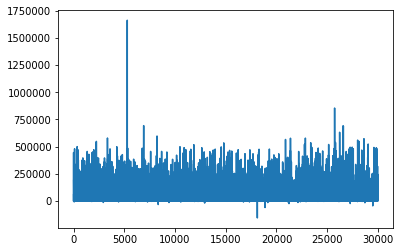

In [30]:
plt.plot(credit['JulyBill'])
plt.show()

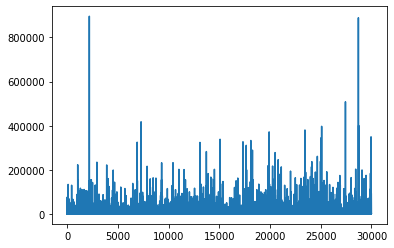

In [31]:
plt.plot(credit['JulyPayment'])
plt.show()

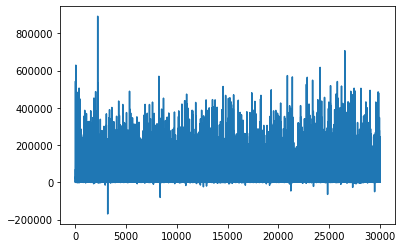

In [32]:
plt.plot(credit['JuneBill'])
plt.show()

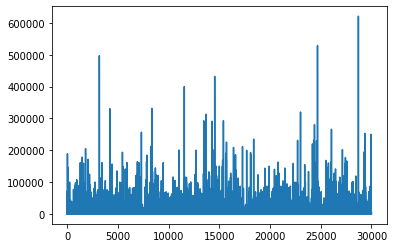

In [33]:
plt.plot(credit['JunePayment'])
plt.show()

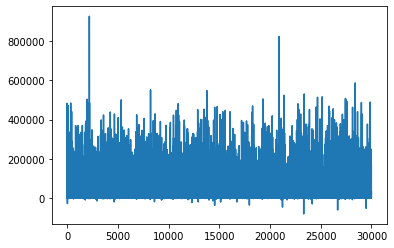

In [34]:
plt.plot(credit['MayBill'])
plt.show()

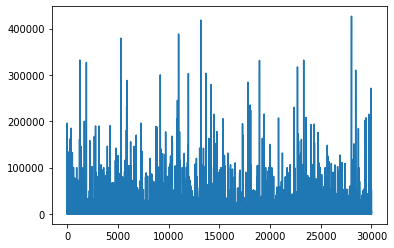

In [35]:
plt.plot(credit['MayPayment'])
plt.show()

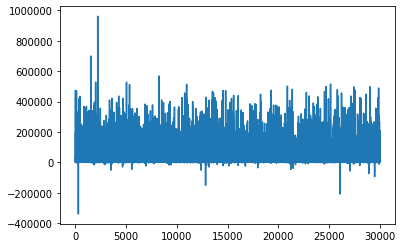

In [36]:
plt.plot(credit['AprilBill'])
plt.show()

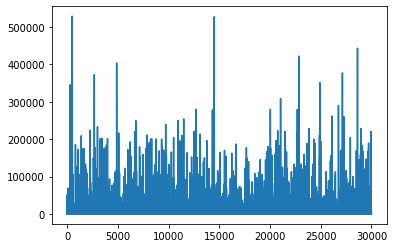

In [37]:
plt.plot(credit['AprilPayment'])
plt.show()

In [38]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'SeptemberPay', 'AugustPay', 'JulyPay', 'JunePay', 'MayPay', 'AprilPay',
       'SeptemberBill', 'AugustBill', 'JulyBill', 'JuneBill', 'MayBill',
       'AprilBill', 'SeptemberPayment', 'AugustPayment', 'JulyPayment',
       'JunePayment', 'MayPayment', 'AprilPayment', 'amount_past_due',
       'default payment next month'],
      dtype='object')


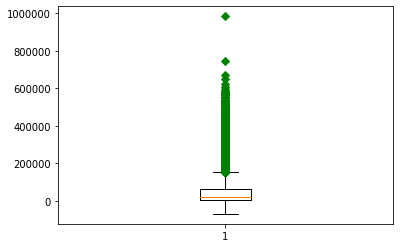

In [40]:
A = credit['AugustBill']
plt.boxplot(A,0,'gD')
plt.show()

In [41]:
corrMat = credit.corr()
print(corrMat)

                  LIMIT_BAL       AGE  SeptemberBill  AugustBill  JulyBill  \
LIMIT_BAL          1.000000  0.144713       0.285430    0.278314  0.283236   
AGE                0.144713  1.000000       0.056239    0.054283  0.053710   
SeptemberBill      0.285430  0.056239       1.000000    0.951484  0.892279   
AugustBill         0.278314  0.054283       0.951484    1.000000  0.928326   
JulyBill           0.283236  0.053710       0.892279    0.928326  1.000000   
JuneBill           0.293988  0.051353       0.860272    0.892482  0.923969   
MayBill            0.295562  0.049345       0.829779    0.859778  0.883910   
AprilBill          0.290389  0.047613       0.802650    0.831594  0.853320   
SeptemberPayment   0.195236  0.026147       0.140277    0.280365  0.244335   
AugustPayment      0.178408  0.021785       0.099355    0.100851  0.316936   
JulyPayment        0.210167  0.029247       0.156887    0.150718  0.130011   
JunePayment        0.203242  0.021379       0.158303    0.147398

In [42]:
covMat = credit.cov()
print(covMat)

                     LIMIT_BAL            AGE  SeptemberBill    AugustBill  \
LIMIT_BAL         1.683446e+10  173076.722569   2.727020e+09  2.570130e+09   
AGE               1.730767e+05      84.969755   3.817293e+04  3.561366e+04   
SeptemberBill     2.727020e+09   38172.933546   5.422240e+09  4.986670e+09   
AugustBill        2.570130e+09   35613.657962   4.986670e+09  5.065705e+09   
JulyBill          2.548533e+09   34334.251320   4.556511e+09  4.582086e+09   
JuneBill          2.453926e+09   30453.108180   4.075286e+09  4.086508e+09   
MayBill           2.331481e+09   27654.067800   3.714795e+09  3.720401e+09   
AprilBill         2.243837e+09   26137.648547   3.519876e+09  3.524868e+09   
SeptemberPayment  4.195711e+08    3992.041735   1.710894e+08  3.305146e+08   
AugustPayment     5.333504e+08    4626.861549   1.685692e+08  1.653859e+08   
JulyPayment       4.801180e+08    4746.824393   2.034048e+08  1.888731e+08   
JunePayment       4.131202e+08    3087.324192   1.826164e+08  1.